#  Clustering

## K-means

We are going to use some synthetic datasets to understand various aspects of Lloyd's algorithm for the k-means  clustering problem.

In [1]:
#use the following numero di matricola
numero_di_matricola = 1

In [2]:
#import all packages needed
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.datasets import make_blobs, make_circles

We start by generating a simple dataset using the $\texttt{make\_blobs}$ function.

Text(0.5, 1.0, 'Input data')

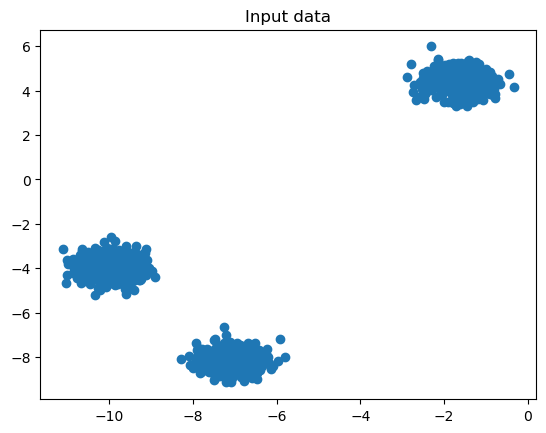

In [3]:
n_samples = 1500

X, y = make_blobs(n_samples=n_samples, cluster_std=[0.4, 0.4, 0.4], random_state = 1)
plt.scatter(X[:, 0], X[:, 1])
plt.title("Input data")

What do you expect a reasonable clustering algorithm to provide as clustering? 

Let's check if this is what we obtain with the $\texttt{KMeans}$ package.

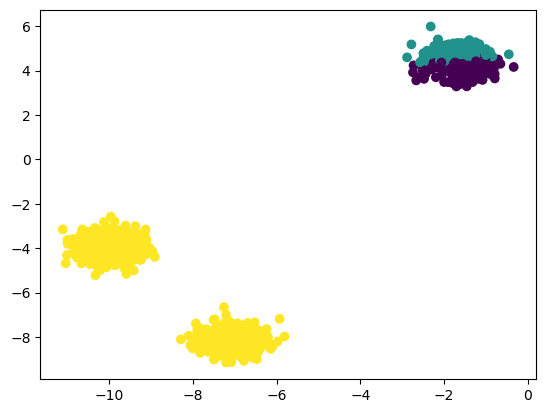

In [4]:
y_pred = KMeans(n_clusters=3, init="random", n_init=1, random_state=6).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
# Try to print the centers.

What is going on here?
The random positions the centers can mess up the things!

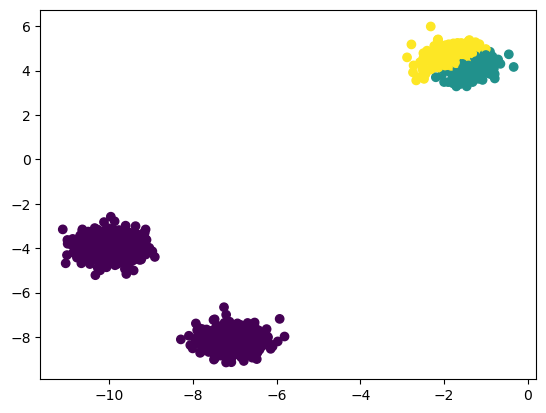

In [5]:
# Define the coordinates of the centers manually.
# We want to get a similar situation to the one shown above.
y_pred = KMeans(n_clusters=3, init=np.array([[-9, -2], [0, 3], [-2, 6]]), n_init=1, random_state=1).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

Ok, maybe we now understand what is going on. How can we check if this is really the case?
We try more than one times with random initn.

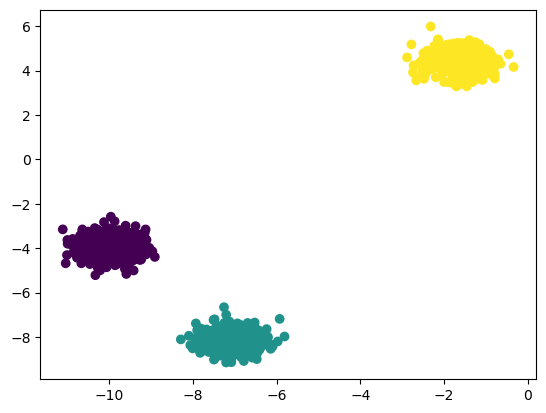

In [6]:
y_pred = KMeans(n_clusters=3, init="random", n_init=9, random_state=1).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

How can we solve this issue? Yes! Running algorithm with random init, many times.

What is the parameter in $\texttt{KMeans}$ to do this? Use 'init' param.

Let's try and see what happens.

What about being able to choose the centers that are kind of far away from each other? This is what is achieved by the $\texttt{k-means++}$ initialization algorithm.

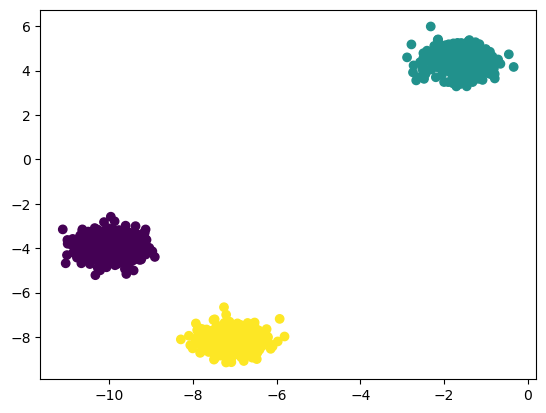

In [7]:
# Use the k-Means++ algorithm => init the centers in such a way that they are kind of far away from each other.
y_pred = KMeans(n_clusters=3, init="k-means++", n_init=6, random_state=1).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

## Choice of the number k of clusters

Lloyd's algorithm assumes that the number $k$ of desired clusters is passed as input. In some applications it makes sense, but in others we do not know $k$. How can decide the value of $k$?

Let's see how the value of the objective function changes when using $k \in \{2, 3, 4, 5\}$. For each value of $k$, we also _print the value of the objective function_ (have a look at the documentation of scikit-learn).

In [8]:
clustering_k2 = KMeans(n_clusters=2, init="k-means++", n_init=6, random_state=1).fit(X)
clustering_k3 = KMeans(n_clusters=3, init="k-means++", n_init=6, random_state=1).fit(X)
clustering_k4 = KMeans(n_clusters=4, init="k-means++", n_init=6, random_state=1).fit(X)
clustering_k5 = KMeans(n_clusters=5, init="k-means++", n_init=6, random_state=1).fit(X)

print("Cost with k = 2", clustering_k2.inertia_)
print("Cost with k = 3", clustering_k3.inertia_)
print("Cost with k = 4", clustering_k4.inertia_)
print("Cost with k = 5", clustering_k5.inertia_)

Cost with k = 2 7035.504153300217
Cost with k = 3 474.29971247335914
Cost with k = 4 417.20600254621536
Cost with k = 5 367.6492823626953


Text(0.5, 1.0, 'k = 2')

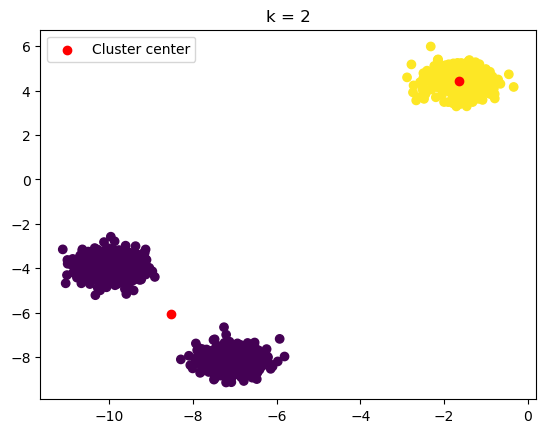

In [9]:
# Print clustering k = 2.
y_pred = clustering_k2.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.scatter(clustering_k2.cluster_centers_[:, 0], clustering_k2.cluster_centers_[:, 1], c="r", label="Cluster center")
plt.legend()
plt.title("k = 2")

Text(0.5, 1.0, 'k = 3')

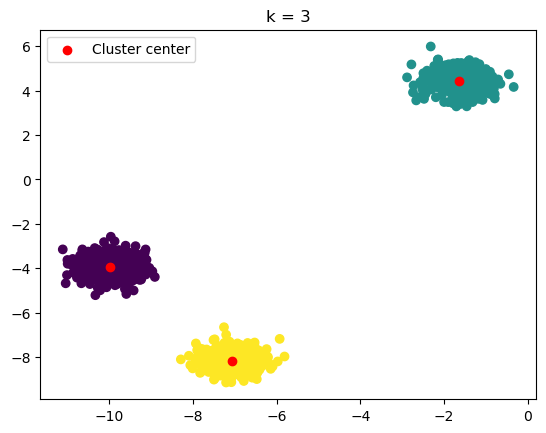

In [10]:
# Print clustering k = 3.
y_pred = clustering_k3.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.scatter(clustering_k3.cluster_centers_[:, 0], clustering_k3.cluster_centers_[:, 1], c="r", label="Cluster center")
plt.legend()
plt.title("k = 3")

Text(0.5, 1.0, 'k = 4')

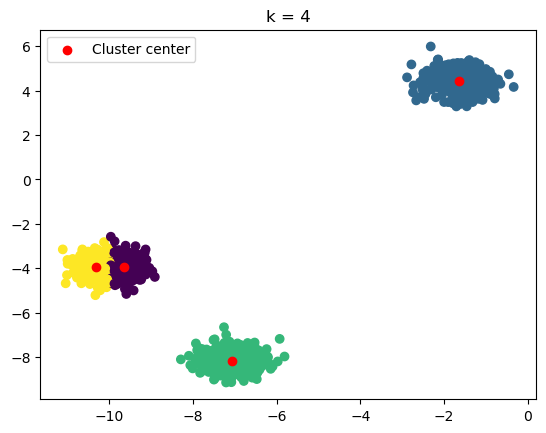

In [11]:
# Print clustering k = 4.
y_pred = clustering_k4.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.scatter(clustering_k4.cluster_centers_[:, 0], clustering_k4.cluster_centers_[:, 1], c="r", label="Cluster center")
plt.legend()
plt.title("k = 4")

Is the clustering with the smallest value of the cost the best one? Let's visualize it.

Text(0.5, 1.0, 'k = 5')

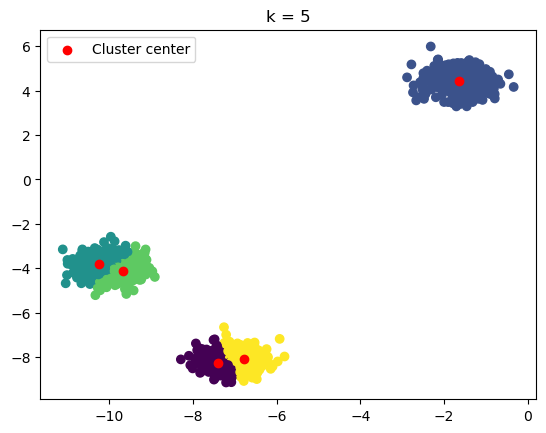

In [12]:
# Print clustering k = 5.
y_pred = clustering_k5.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.scatter(clustering_k5.cluster_centers_[:, 0], clustering_k5.cluster_centers_[:, 1], c="r", label="Cluster center")
plt.legend()
plt.title("k = 5")

Why does this happen?
The more centers we use, the lower the objective function!
Edge case: use exactly $m$ centers! (Objcetive function has cost 0).

Let's use a different approach: the silhouette coefficient. For each of the clusterings obtained above (with $k \in \{2,3,4,5\}$), compute its average silhouette score (again, see the documentation of scikit-learn for more details).

In [13]:
from sklearn.metrics import silhouette_score

print("Silhouette score k = 2:", silhouette_score(X, clustering_k2.predict(X)))
print("Silhouette score k = 3:", silhouette_score(X, clustering_k3.predict(X)))
print("Silhouette score k = 4:", silhouette_score(X, clustering_k4.predict(X)))
print("Silhouette score k = 5:", silhouette_score(X, clustering_k5.predict(X)))

Silhouette score k = 2: 0.8275838311475989
Silhouette score k = 3: 0.8876900165022624
Silhouette score k = 4: 0.706500531124962
Silhouette score k = 5: 0.5232695552893146


Remember that: the higher score $S(C)$, the better the clustering quality.
Therefore, as we can see, the best result is the clustering with $k=3$.

---
Let's test this approach to a new dataset, similar to the previous one, but with a bit more noise.  

Text(0.5, 1.0, 'Input data')

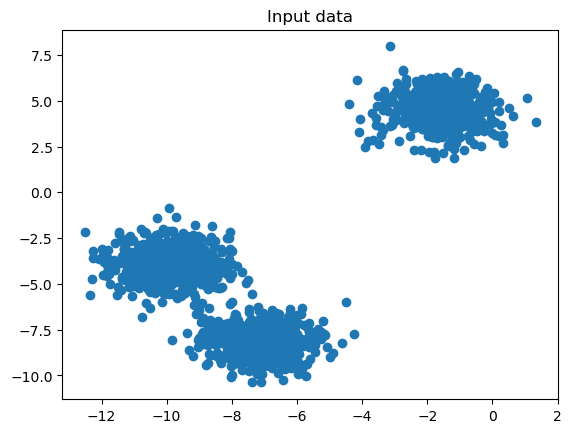

In [14]:
n_samples = 1500

X, y = make_blobs(n_samples=n_samples, cluster_std=[0.9, 0.9, 0.9], random_state = 1)
plt.scatter(X[:, 0], X[:, 1])
plt.title("Input data")

Let's compute the values of the silhouette score for different values of $k \in \{2,3,4,5\}$ as before. Remember to perform again the clustering for the new data!

In [15]:
# Perform the clustering first.
clustering_k2 = KMeans(n_clusters=2, init="k-means++", n_init=6, random_state=1).fit(X)
clustering_k3 = KMeans(n_clusters=3, init="k-means++", n_init=6, random_state=1).fit(X)
clustering_k4 = KMeans(n_clusters=4, init="k-means++", n_init=6, random_state=1).fit(X)
clustering_k5 = KMeans(n_clusters=5, init="k-means++", n_init=6, random_state=1).fit(X)

According to the silhouette score, which is the best value for $k$? Let's also have a look at the objective function.

In [16]:
# Print the objective function value and the score for each cluster.
print("k = 2, cost={:.4f}, score={:.4f}".format(clustering_k2.inertia_, silhouette_score(X, clustering_k2.predict(X))))
print("k = 3, cost={:.4f}, score={:.4f}".format(clustering_k3.inertia_, silhouette_score(X, clustering_k3.predict(X))))
print("k = 4, cost={:.4f}, score={:.4f}".format(clustering_k4.inertia_, silhouette_score(X, clustering_k4.predict(X))))
print("k = 5, cost={:.4f}, score={:.4f}".format(clustering_k5.inertia_, silhouette_score(X, clustering_k5.predict(X))))

k = 2, cost=8964.3612, score=0.7784
k = 3, cost=2393.0089, score=0.7477
k = 4, cost=2104.2432, score=0.6132
k = 5, cost=1841.8048, score=0.5000


By looking both at the value of the objective function and at the silhouette score, which is the best value for $k$? Why?

The best score is achieved by setting $k = 2$, however with $k=3$ we get a similar score.
Also note that the cost associated to $k=3$ is lower (i.e. better) than the one associated to $k=2$.
So the choice is among the two.
I would prefer $k=3$ because the cost is much lower; the score instead is more or less the same.
Also, as we can see from the plotting of the data, $k=3$ is clearly the best choice.

Text(0.5, 1.0, 'k = 2')

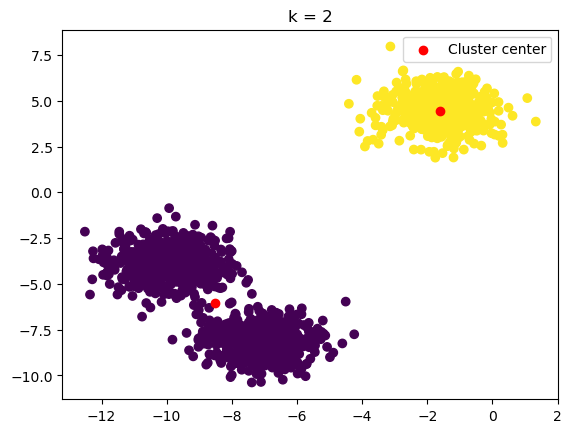

In [17]:
# Plot clustering with k = 2.
y_pred = clustering_k2.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.scatter(clustering_k2.cluster_centers_[:, 0], clustering_k2.cluster_centers_[:, 1], c="r", label="Cluster center")
plt.legend()
plt.title("k = 2")

Text(0.5, 1.0, 'k = 3')

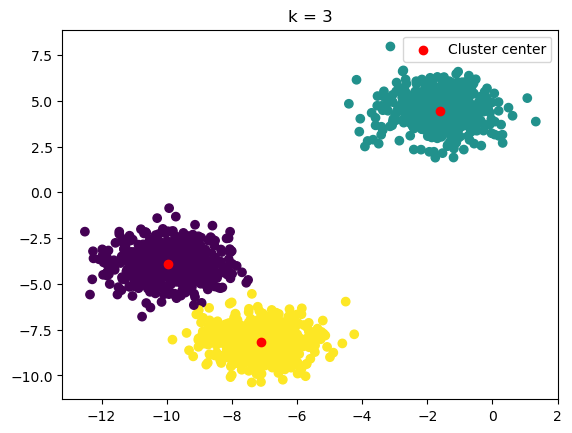

In [18]:
# Plot clustering with k = 3.
y_pred = clustering_k3.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.scatter(clustering_k3.cluster_centers_[:, 0], clustering_k3.cluster_centers_[:, 1], c="r", label="Cluster center")
plt.legend()
plt.title("k = 3")

Let's plot the (normalized) objective function and the silhouette score to better understand what happens.

Clustering with k=2: Cost=8964.36, Silhouette=0.78
Clustering with k=3: Cost=2393.01, Silhouette=0.75
Clustering with k=4: Cost=2155.08, Silhouette=0.61
Clustering with k=5: Cost=1870.67, Silhouette=0.49
Clustering with k=6: Cost=1643.39, Silhouette=0.30
Clustering with k=7: Cost=1449.61, Silhouette=0.32
Clustering with k=8: Cost=1266.77, Silhouette=0.32
Clustering with k=9: Cost=1163.31, Silhouette=0.33
Clustering with k=10: Cost=1064.29, Silhouette=0.34


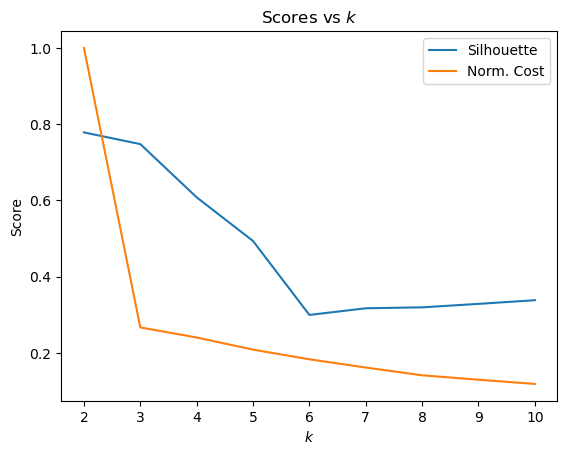

In [19]:
# -- Copy-paste the code from the Plot function (silohuette & obj. fun) section here.
n_clusters = range(2, 11)
silhouettes = []
obj_fun_scores = []

for k in n_clusters:
    clustering = KMeans(n_clusters=k, 
                        init='k-means++',
                        n_init=1, 
                        random_state=numero_di_matricola).fit(X)
    silhouette = silhouette_score(X, clustering.predict(X))
    silhouettes.append(silhouette)
    obj_fun_scores.append(clustering.inertia_)
    print(f"Clustering with k={k}: Cost={clustering.inertia_:.2f}, Silhouette={silhouette:.2f}")

obj_fun_scores = np.array(obj_fun_scores)
obj_fun_scores = obj_fun_scores / max(obj_fun_scores)

plt.plot(n_clusters, silhouettes, label='Silhouette')
plt.plot(n_clusters, obj_fun_scores, label='Norm. Cost')
plt.title(r'Scores vs $k$')
plt.xlabel(r'$k$')
plt.ylabel('Score')
plt.legend();

We can clearly see that the choice of $k=3$ is better than $k=2$ because in the second case the cost is much higher.

## Limitation of $k$-means

The results look good on a simple dataset, but what about a more complicated one? Let's generate a dataset using $\texttt{make\_circles}$.

Text(0.5, 1.0, 'Input data')

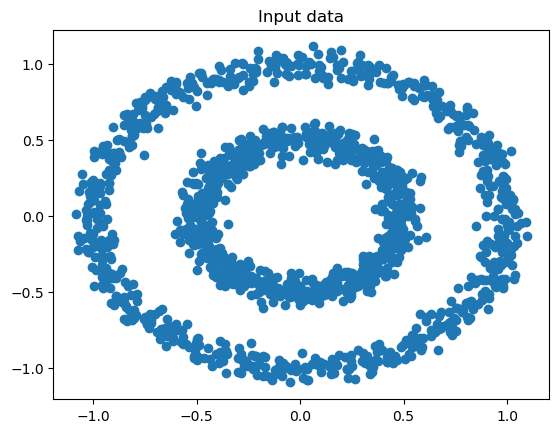

In [20]:
X, y = make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
plt.scatter(X[:, 0], X[:, 1])
plt.title("Input data")

Let's run Lloyd's algorithm with random initialization.

Text(0.5, 1.0, 'k = 2')

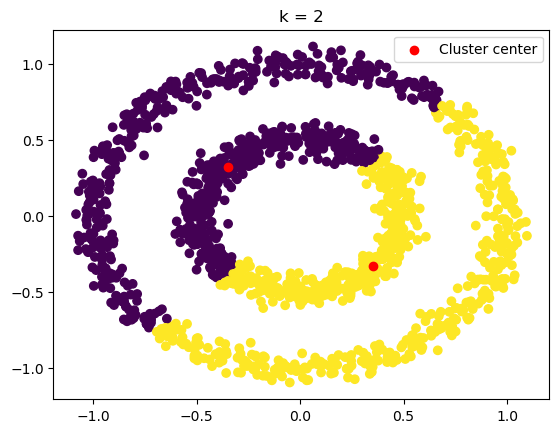

In [21]:
clustering = KMeans(n_clusters=2, init="random", n_init=10, random_state=numero_di_matricola).fit(X)
y_pred = clustering.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.scatter(clustering.cluster_centers_[:, 0], clustering.cluster_centers_[:, 1], c="r", label="Cluster center")
plt.legend()
plt.title("k = 2")

What about with $\texttt{k-means++}$?

Text(0.5, 1.0, 'k = 20')

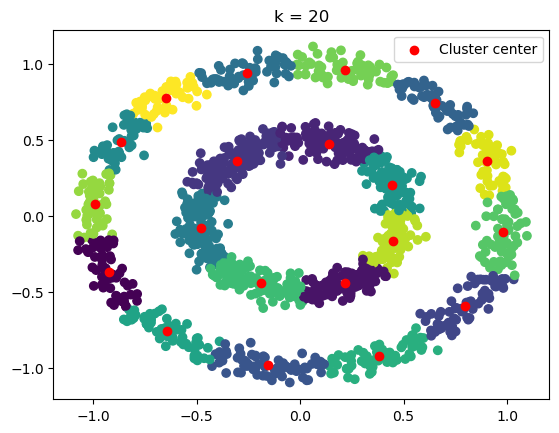

In [22]:
# Try with higher k.
clustering = KMeans(n_clusters=20, init="k-means++", random_state=numero_di_matricola).fit(X)
y_pred = clustering.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.scatter(clustering.cluster_centers_[:, 0], clustering.cluster_centers_[:, 1], c="r", label="Cluster center")
plt.legend()
plt.title("k = 20")

It is a complete mess.

Let's try with a different clustering technique: _agglomerative_ clustering!

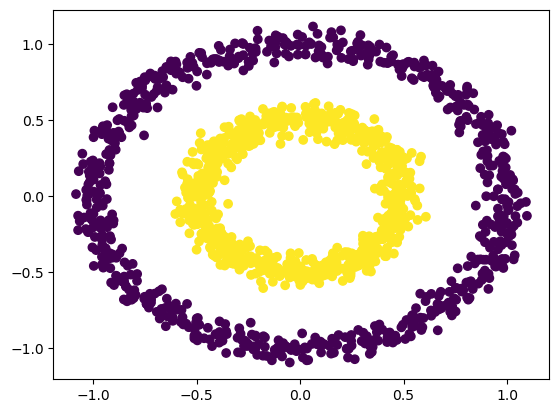

In [23]:
y_pred = AgglomerativeClustering(n_clusters=2, linkage="single").fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

What about the simple dataset we used at the beginning? Let's generate the dataset.

Text(0.5, 1.0, 'Input data')

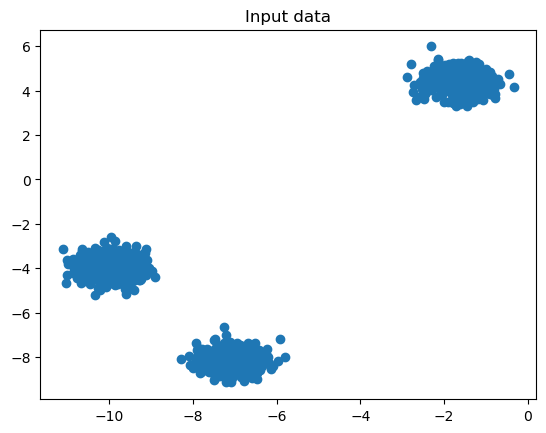

In [24]:
X, y = make_blobs(n_samples=n_samples, cluster_std=[0.4, 0.4, 0.4], random_state=1)
plt.scatter(X[:, 0], X[:, 1])
plt.title("Input data")

Let use hierarchical clustering with the _single_ linkage options.

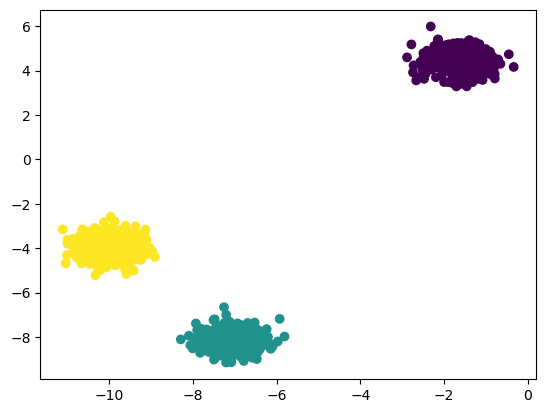

In [25]:
y_pred = AgglomerativeClustering(n_clusters=3, linkage="single").fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

Let's try a more complex dataset, but still with some easy-to-detect cluster structure.

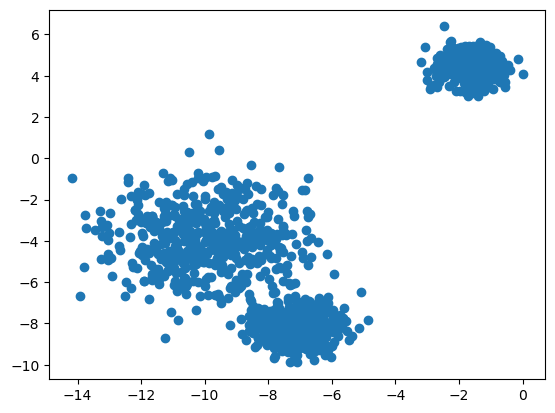

In [26]:
X, y = make_blobs(n_samples=n_samples, cluster_std=[0.5, 1.5, 0.7], random_state=numero_di_matricola)
plt.scatter(X[:, 0], X[:, 1])

What do we expect as a reasonable clustering?

Let's try with Lloyd's algorithm, and also with k-means++ initialization.

Text(0.5, 1.0, 'k = 3')

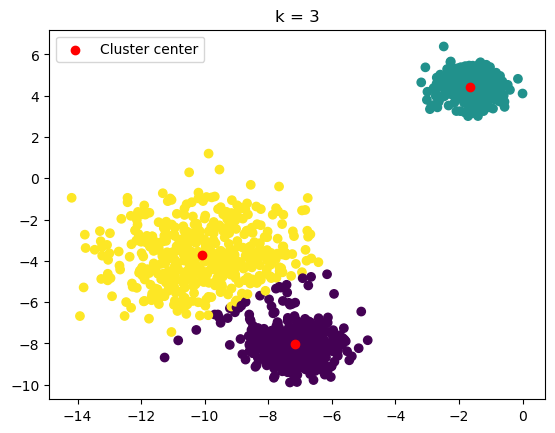

In [27]:
# Try with k = 3.
clustering_kMeans = KMeans(n_clusters=3, init="random", n_init=10, random_state=numero_di_matricola).fit(X)
y_pred = clustering_kMeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.scatter(clustering_kMeans.cluster_centers_[:, 0], clustering_kMeans.cluster_centers_[:, 1], c="r", label="Cluster center")
plt.legend()
plt.title("k = 3")

Text(0.5, 1.0, 'k = 3')

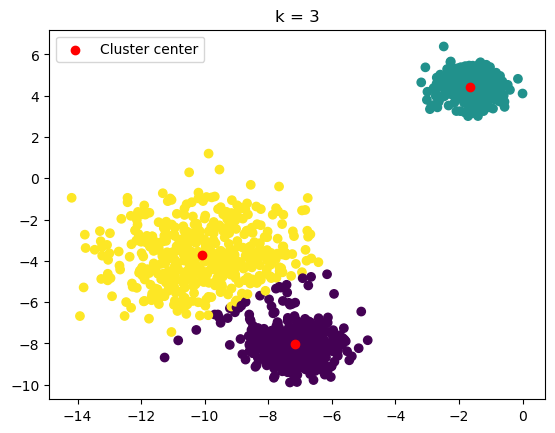

In [28]:
# K-means++ with k = 3.
clustering_kMeanspp = KMeans(n_clusters=3, init="k-means++", random_state=numero_di_matricola).fit(X)
y_pred = clustering_kMeanspp.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.scatter(clustering_kMeanspp.cluster_centers_[:, 0], clustering_kMeanspp.cluster_centers_[:, 1], c="r", label="Cluster center")
plt.legend()
plt.title("k = 3")

What about hierarchical clustering?

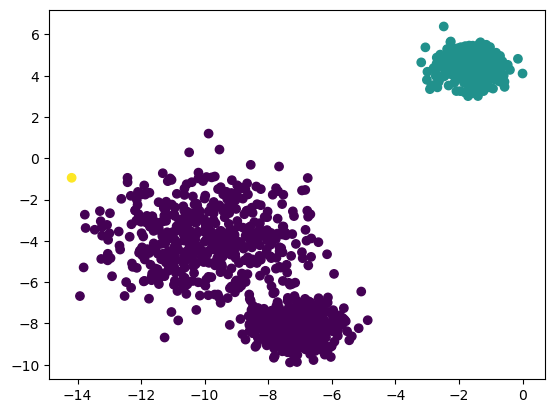

In [29]:
# Aggolmerative clustering with k = 3.
y_pred = AgglomerativeClustering(n_clusters=3, linkage="single").fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

Moral of the story: no ultimate clustering technique!

In [30]:
# Compute the score of the clustering.
print("k = 2, kMeans: score={:.7f}".format(silhouette_score(X, clustering_kMeans.predict(X))))
print("k = 2, kMeans++: score={:.7f}".format(silhouette_score(X, clustering_kMeanspp.predict(X))))
print("k = 2, aggolmerative: score={:.7f}".format(silhouette_score(X, AgglomerativeClustering(n_clusters=3).fit_predict(X))))

k = 2, kMeans: score=0.7268307
k = 2, kMeans++: score=0.7268307
k = 2, aggolmerative: score=0.7209134


### Plot function (silhouette & obj. fun.)

Clustering with k=2: Cost=9648.71, Silhouette=0.78
Clustering with k=3: Cost=2915.77, Silhouette=0.73
Clustering with k=4: Cost=2154.34, Silhouette=0.66
Clustering with k=5: Cost=1754.67, Silhouette=0.64
Clustering with k=6: Cost=1478.47, Silhouette=0.65
Clustering with k=7: Cost=1315.51, Silhouette=0.52
Clustering with k=8: Cost=1185.92, Silhouette=0.53
Clustering with k=9: Cost=1050.53, Silhouette=0.53
Clustering with k=10: Cost=991.43, Silhouette=0.53


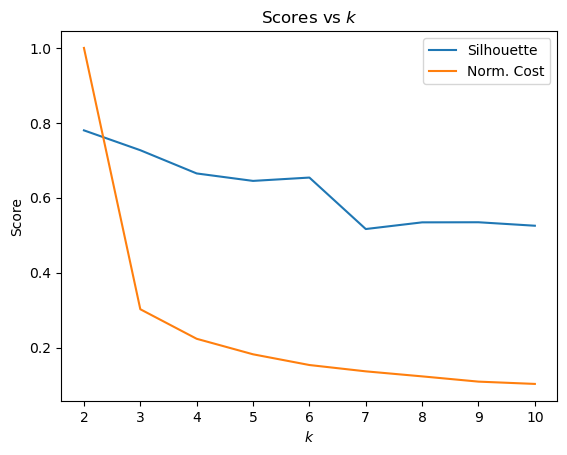

In [31]:
n_clusters = range(2, 11)
silhouettes = []
obj_fun_scores = []

for k in n_clusters:
    clustering = KMeans(n_clusters=k, 
                        init='k-means++',
                        n_init=1, 
                        random_state=numero_di_matricola).fit(X)
    silhouette = silhouette_score(X, clustering.predict(X))
    silhouettes.append(silhouette)
    obj_fun_scores.append(clustering.inertia_)
    print(f"Clustering with k={k}: Cost={clustering.inertia_:.2f}, Silhouette={silhouette:.2f}")

obj_fun_scores = np.array(obj_fun_scores)
obj_fun_scores = obj_fun_scores / max(obj_fun_scores)

plt.plot(n_clusters, silhouettes, label='Silhouette')
plt.plot(n_clusters, obj_fun_scores, label='Norm. Cost')
plt.title(r'Scores vs $k$')
plt.xlabel(r'$k$')
plt.ylabel('Score')
plt.legend();

### Since is the last lab ...

In [32]:
import random
import time

def christmas_tree():
    tree_height = 16

    print("\n\n🎄 Merry Christmas! 🎄\n".center(40))

    for i in range(tree_height):
        
        spaces = " " * (tree_height - i - 1)

        if i == 0:
            layer_content = "⭐"
        else:
            contents = [ "🍃", "🟡", "🔴", "🔵"]
            content = random.choices(contents, weights = [0.7, 0.1, 0.1, 0.1], k = 2 * i + 1)
            delimiter = ""
            layer_content = delimiter.join(content)

        print((spaces + layer_content).center(40))

    trunk = " " * (tree_height - 1) + "🟫"
    print(trunk.center(40))

christmas_tree()

        

🎄 Merry Christmas! 🎄
         
                           ⭐            
                         🍃🍃🍃            
                        🟡🍃🍃🍃🍃           
                      🍃🍃🍃🍃🍃🍃🍃           
                     🍃🍃🍃🍃🍃🍃🟡🟡🍃          
                   🍃🍃🍃🍃🍃🍃🍃🔴🍃🔵🍃          
                  🍃🍃🍃🔵🔵🔴🍃🔵🟡🍃🍃🍃🔴         
                🔴🔵🍃🔵🍃🍃🍃🍃🟡🍃🔴🟡🍃🍃🔵         
               🍃🔵🍃🔵🍃🍃🍃🍃🍃🍃🍃🔵🍃🔴🍃🍃🔴        
             🍃🔵🍃🟡🍃🍃🟡🍃🔵🍃🍃🍃🟡🍃🍃🍃🟡🍃🍃        
            🍃🔴🍃🟡🍃🍃🍃🍃🔴🍃🍃🟡🍃🍃🍃🍃🍃🍃🔴🟡🔴       
          🍃🍃🍃🔵🍃🍃🍃🍃🍃🟡🍃🍃🔵🍃🍃🔴🍃🟡🍃🍃🔵🔴🍃       
         🍃🟡🔵🍃🍃🟡🍃🔴🍃🍃🟡🍃🍃🍃🍃🍃🟡🟡🔵🍃🍃🍃🍃🍃🍃      
       🟡🍃🍃🟡🍃🍃🍃🍃🍃🍃🍃🍃🍃🔵🍃🍃🍃🍃🍃🍃🍃🍃🍃🍃🍃🍃🔵      
      🍃🍃🍃🍃🔴🔴🔵🍃🔵🍃🍃🍃🔴🔴🍃🟡🔴🍃🔴🍃🔴🍃🍃🍃🍃🍃🍃🍃🍃     
    🍃🍃🍃🍃🍃🍃🔴🍃🍃🍃🍃🍃🍃🍃🟡🟡🍃🍃🟡🍃🟡🟡🍃🟡🍃🍃🍃🍃🍃🔴🍃     
                           🟫            
